### Import
***

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
from scipy.stats import norm
import scienceplots
plt.style.use('science')


In [27]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [28]:
palette = ["#003f5c",
    "#58508d",
    "#bc5090",
    "#ff6361",
    "#ffa600"
]

### No Attributes (Baseline)
***

In [29]:
df_none = pd.read_csv('../assets/0_0_0_0_0_0_0_0.csv')
df_none.tail()

,winner,games,point_difference,playable_draws,total_draws,win_rate,points_difference_per_game,chance_of_playable_draw
99995,Luck,24,-84,2832,8173,0.499250,-0.304342,0.334758
99996,Luck,27,-115,4380,11898,0.499245,-0.305489,0.334758
99997,Skill,22,122,1970,6401,0.499250,-0.304266,0.334758
99998,Skill,19,298,2482,7368,0.499255,-0.301283,0.334758
99999,Luck,33,-297,2839,8217,0.499250,-0.304250,0.334758


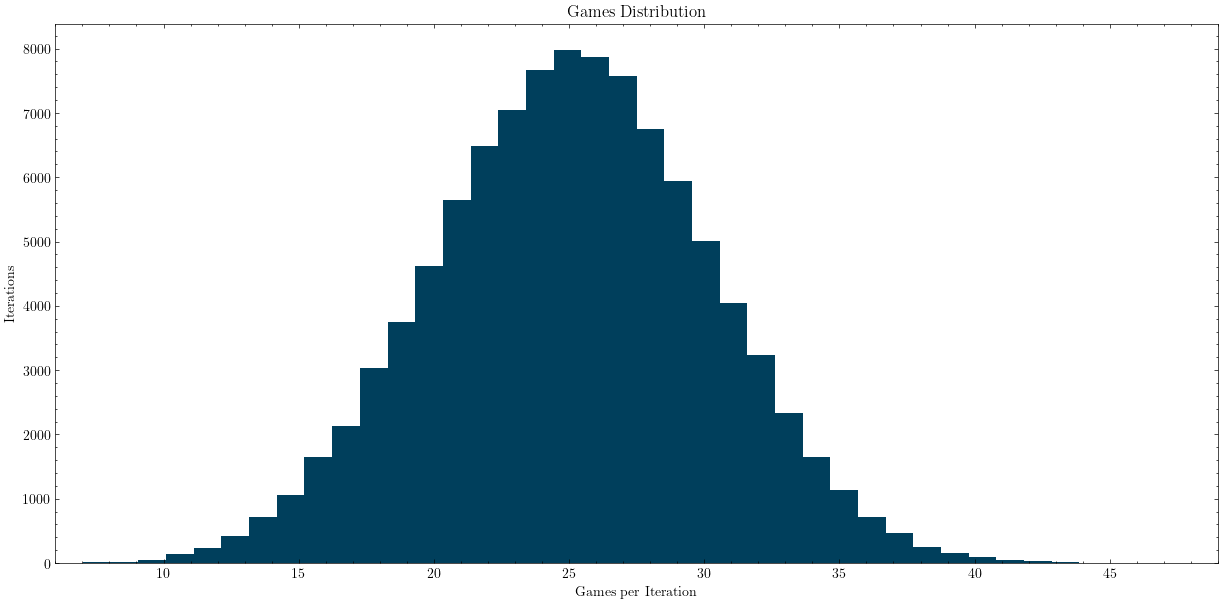

In [30]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(df_none["games"], bins = len(df_none["games"].unique()), color = palette[0])
plt.title("Games Distribution")
plt.xlabel("Games per Iteration")
plt.ylabel("Iterations")
plt.margins(x=0)
plt.show()

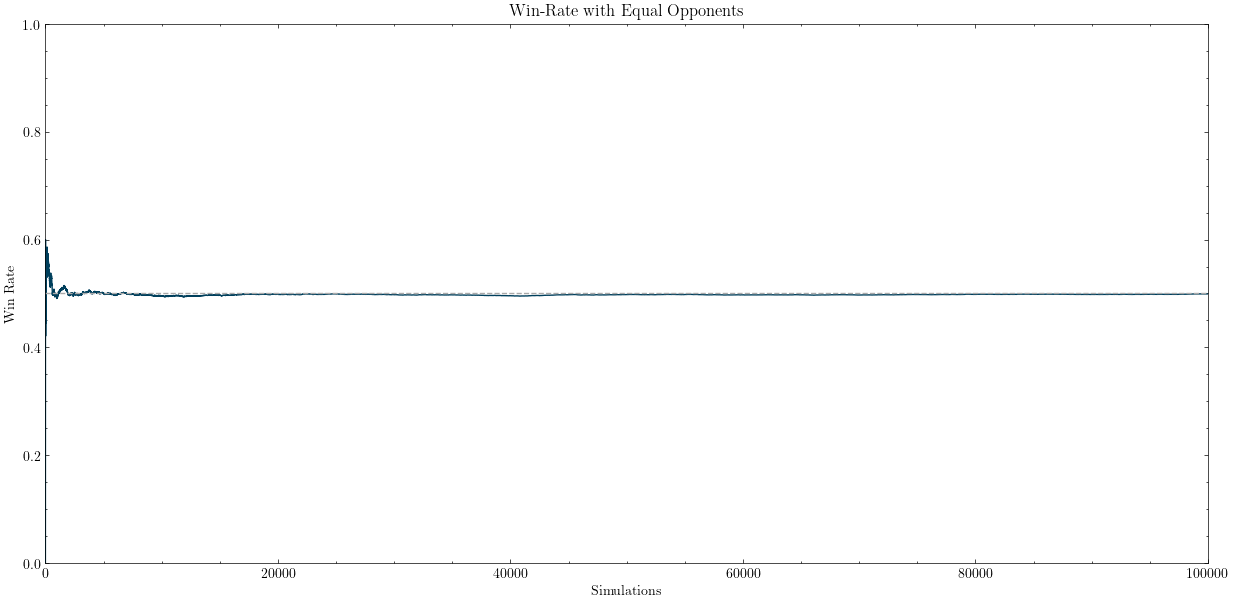

In [31]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_none.index, df_none["win_rate"], color = palette[0])
plt.hlines(0.5, 0, len(df_none), color = "#a9a9a9", linestyles="dashed")

plt.title("Win-Rate with Equal Opponents")
plt.ylim(0,1)
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.margins(x=0)
plt.show()

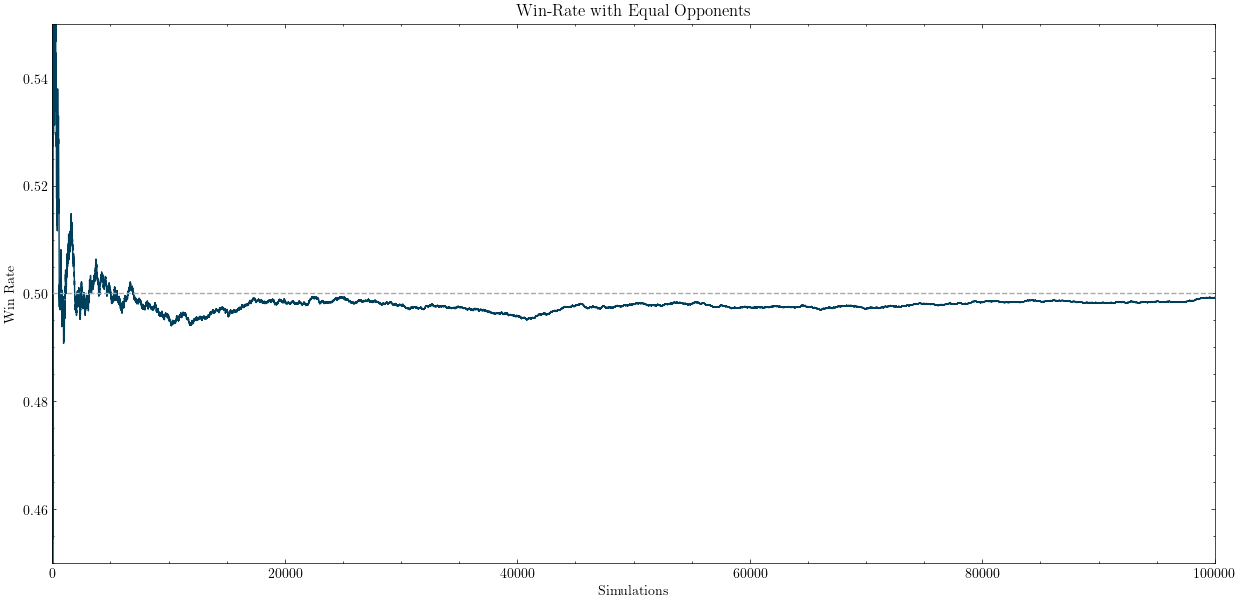

In [32]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_none.index, df_none["win_rate"], color = palette[0])
plt.hlines(0.5, 0, len(df_none), color = "#a9a9a9", linestyles="dashed")

plt.title("Win-Rate with Equal Opponents")
plt.ylim(0.45,0.55)
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.margins(x=0)
plt.show()

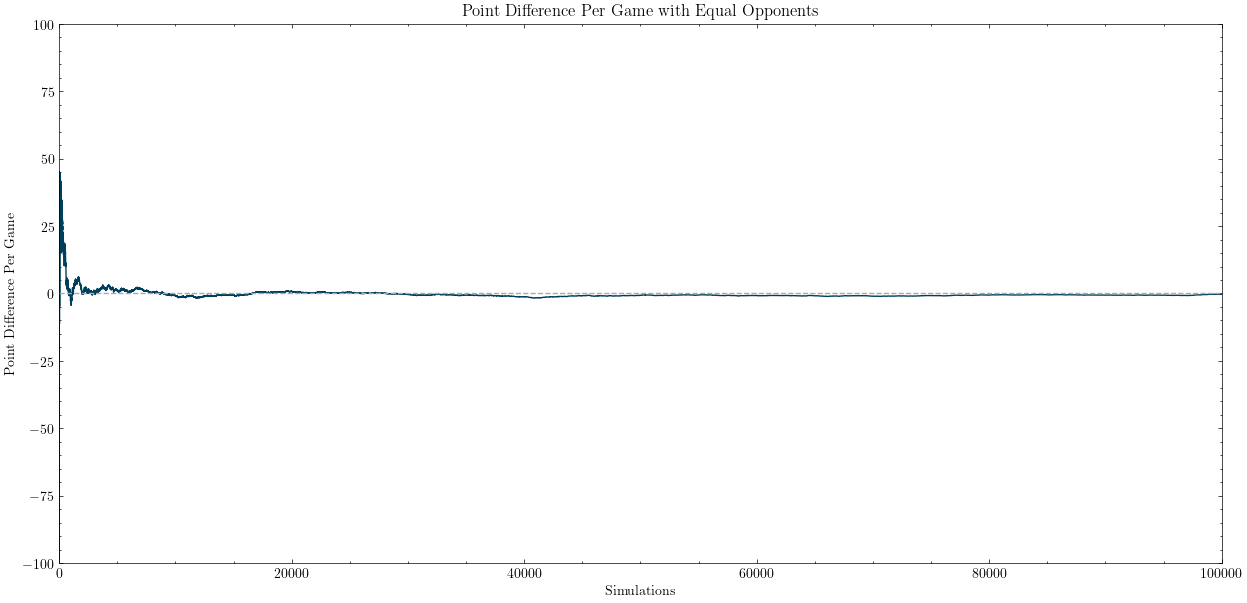

In [33]:
fig = plt.figure(1, figsize=(15,7))
plt.plot(df_none.index, df_none["points_difference_per_game"], color = palette[0])
plt.hlines(0, 0, len(df_none), colors="#a9a9a9", linestyles="dashed")

plt.title("Point Difference Per Game with Equal Opponents")
plt.xlabel("Simulations")
plt.ylabel("Point Difference Per Game")
plt.margins(x=0)
plt.ylim(-100,100)
plt.show()

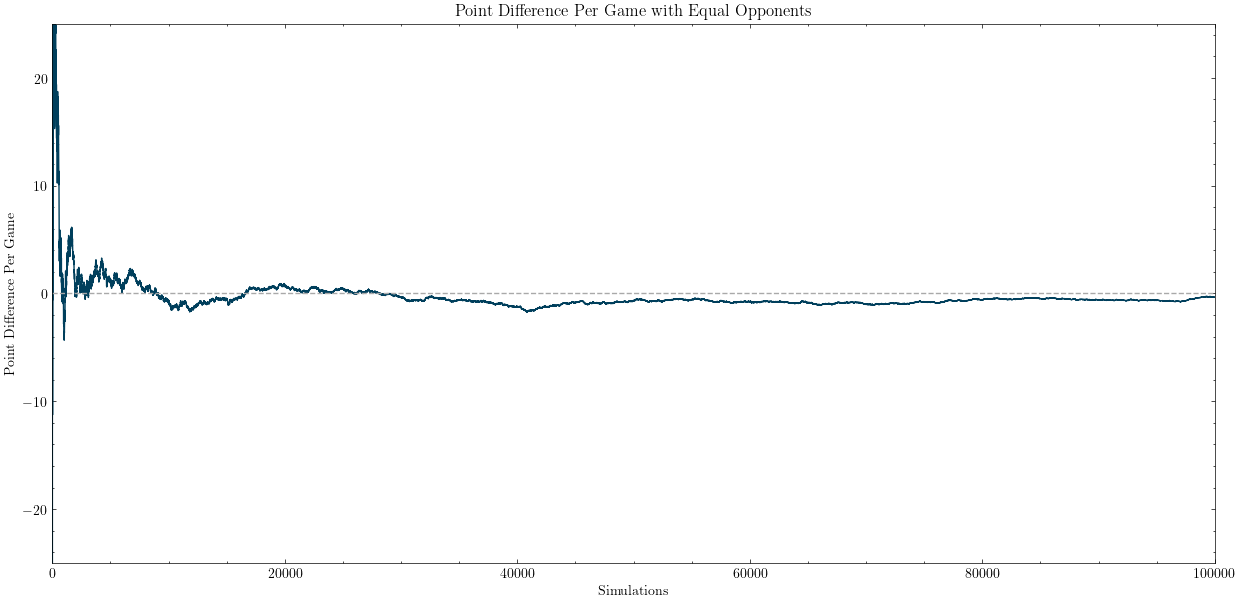

In [34]:
fig = plt.figure(1, figsize=(15,7))
plt.plot(df_none.index, df_none["points_difference_per_game"], color = palette[0])
plt.hlines(0, 0, len(df_none), colors="#a9a9a9", linestyles="dashed")

plt.title("Point Difference Per Game with Equal Opponents")
plt.xlabel("Simulations")
plt.ylabel("Point Difference Per Game")
plt.margins(x=0)
plt.ylim(-25,25)
plt.show()

### Comparison of Skill Attributes
***

In [35]:
df_color = pd.read_csv('../assets/1_0_0_0_0_0_0_0.csv')
print(f"Wild_Color: \n {df_color.tail(1)}\n")

df_highest = pd.read_csv('../assets/0_1_0_0_0_0_0_0.csv')
print(f"Highest_Card: \n {df_highest.tail(1)}\n")

df_disfavor = pd.read_csv('../assets/0_0_1_0_0_0_0_0.csv')
print(f"Disfavor_Wild: \n {df_disfavor.tail(1)}\n")

df_skip = pd.read_csv('../assets/0_0_0_1_0_0_0_0.csv')
print(f"Skip_Chain: \n {df_skip.tail(1)}\n")

df_plus = pd.read_csv('../assets/0_0_0_0_1_0_0_0.csv')
print(f"Plus_Uno: \n {df_plus.tail(1)}\n")

attributes = ["Color", "Highest", "Disfavor", "Plus", "Skip"]
end_values = [df_color.tail(1), df_highest.tail(1), df_disfavor.tail(1), df_skip.tail(1), df_plus.tail(1)]
winrates = [round(df["win_rate"].iloc[0],2) for df in end_values]
point_differences = [df["points_difference_per_game"].iloc[0] for df in end_values]


Wild_Color: 
       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999  Skill     20               240            1555         4581   0.72753   

       points_difference_per_game  chance_of_playable_draw  
99999                   119.75617                 0.337987  

Highest_Card: 
       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999  Skill     27               130            1693         4847   0.69444   

       points_difference_per_game  chance_of_playable_draw  
99999                    95.10394                 0.334984  

Disfavor_Wild: 
       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999  Skill     30                55            5009        15590   0.56581   

       points_difference_per_game  chance_of_playable_draw  
99999                    32.41297                 0.334543  

Skip_Chain: 
       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999  

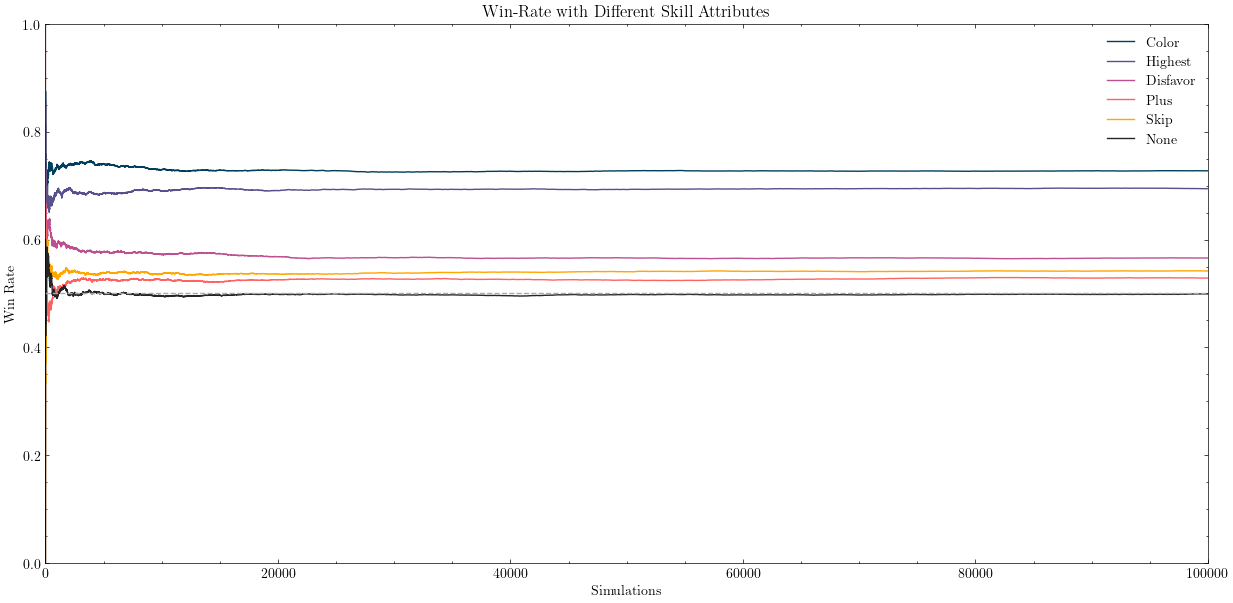

In [36]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_color.index, df_color["win_rate"], color = palette[0], label = "Color")
plt.plot(df_highest.index, df_highest["win_rate"], color = palette[1], label = "Highest")
plt.plot(df_disfavor.index, df_disfavor["win_rate"], color = palette[2], label = "Disfavor")
plt.plot(df_plus.index, df_plus["win_rate"], color = palette[3], label = "Plus")
plt.plot(df_skip.index, df_skip["win_rate"], color = palette[4], label = "Skip")
plt.plot(df_none.index, df_none["win_rate"], color = "#242526", label = "None")
plt.legend()

plt.hlines(0.5, 0, len(df_color), color = "#a9a9a9", linestyles="dashed")

plt.title("Win-Rate with Different Skill Attributes")
plt.ylim(0,1)
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.margins(x=0)
plt.show()

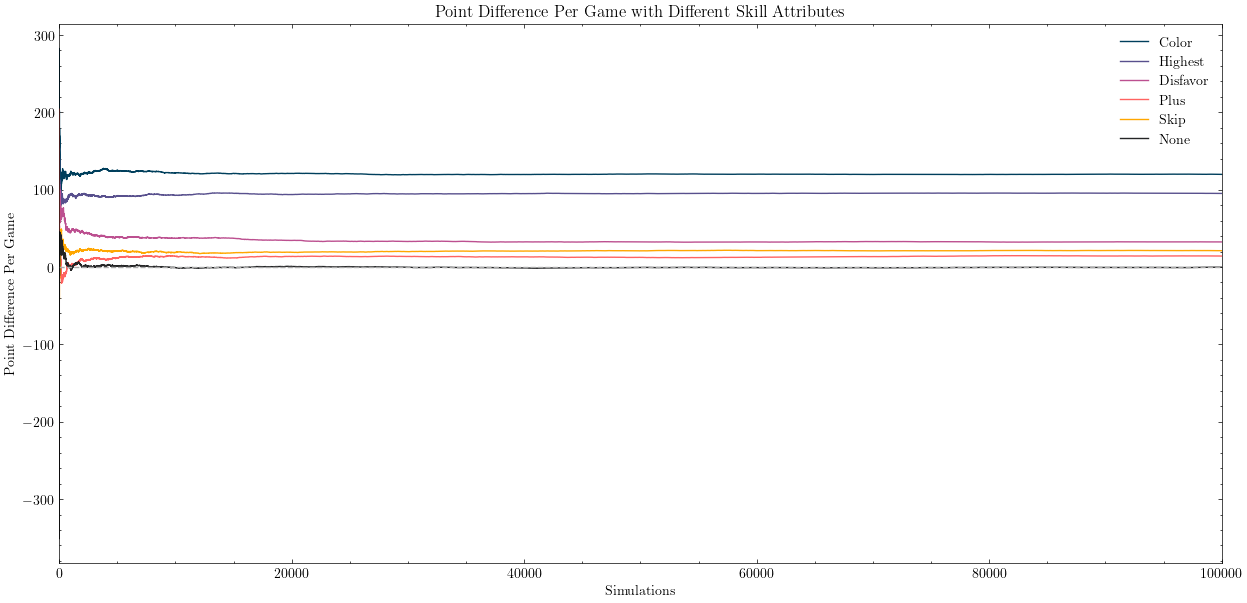

In [37]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_color.index, df_color["points_difference_per_game"], color = palette[0], label = "Color")
plt.plot(df_highest.index, df_highest["points_difference_per_game"], color = palette[1], label = "Highest")
plt.plot(df_disfavor.index, df_disfavor["points_difference_per_game"], color = palette[2], label = "Disfavor")
plt.plot(df_plus.index, df_plus["points_difference_per_game"], color = palette[3], label = "Plus")
plt.plot(df_skip.index, df_skip["points_difference_per_game"], color = palette[4], label = "Skip")
plt.plot(df_none.index, df_none["points_difference_per_game"], color = "#242526", label = "None")
plt.legend()

plt.hlines(0, 0, len(df_none), color="#a9a9a9", linestyles="dashed")

plt.title("Point Difference Per Game with Different Skill Attributes")
plt.xlabel("Simulations")
plt.ylabel("Point Difference Per Game")
plt.margins(x=0)
plt.show()

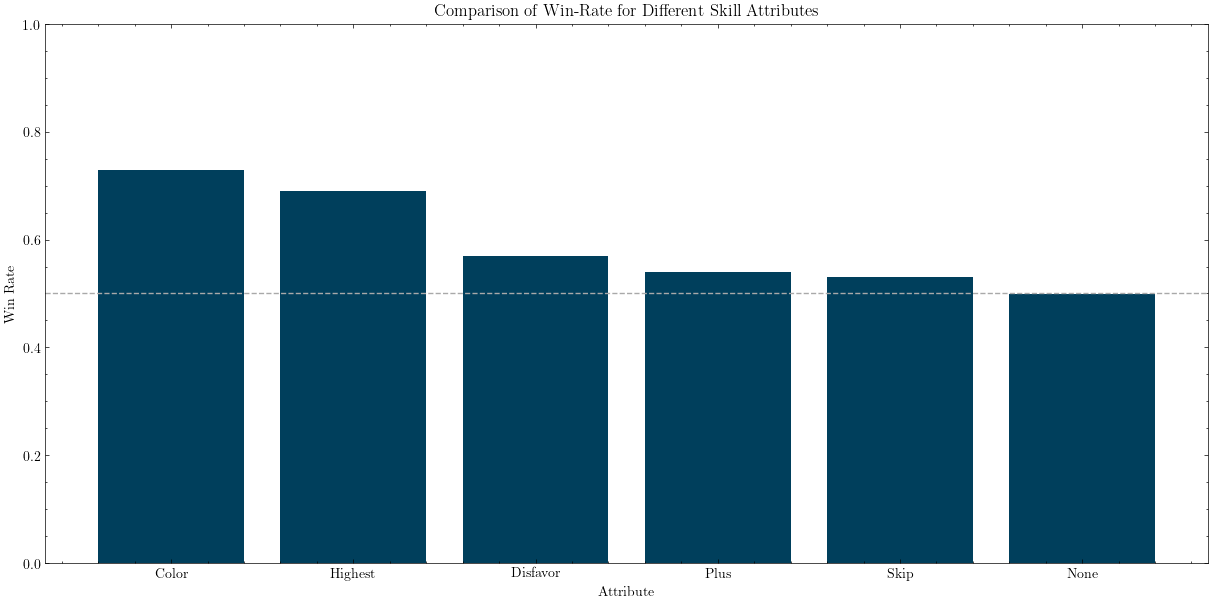

In [38]:
fig = plt.figure(1, figsize=(15,7))

plt.bar(attributes, winrates, color = palette[0])
plt.bar("None", df_none["win_rate"].tail(1).iloc[0], color = palette[0])
plt.title("Comparison of Win-Rate for Different Skill Attributes")
plt.xlabel("Attribute")
plt.ylabel("Win Rate")
plt.ylim(0,1)

plt.axhline(y=0.5, color="#a9a9a9", linestyle="dashed")

plt.show()

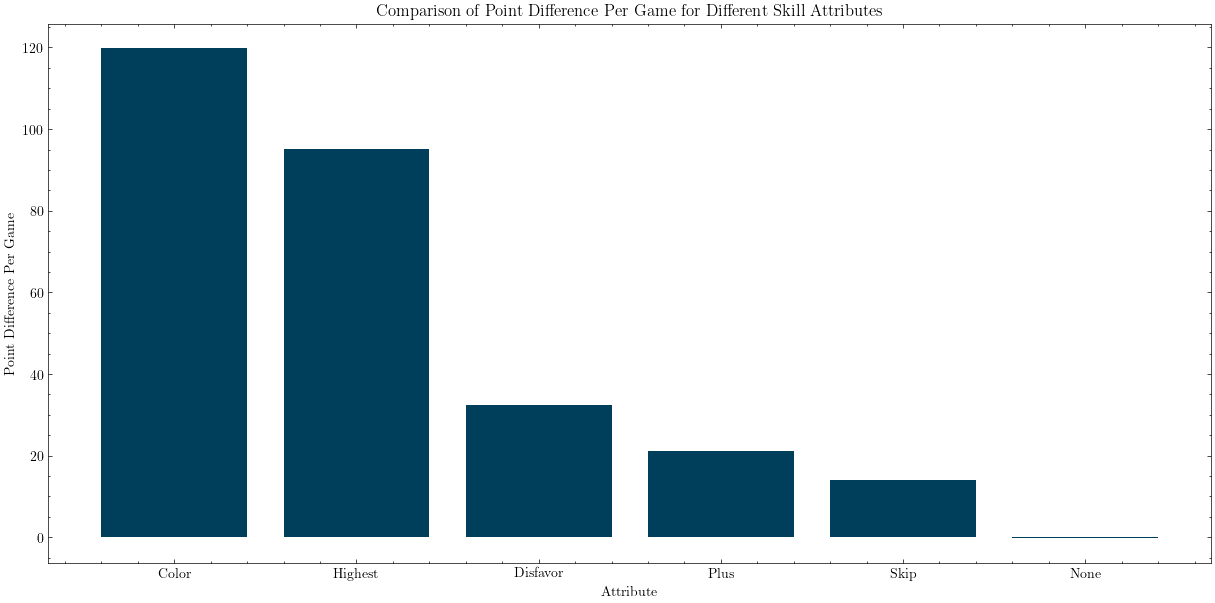

In [39]:
fig = plt.figure(1, figsize=(15,7))


plt.bar(attributes, point_differences, color = palette[0])
plt.bar("None", df_none["points_difference_per_game"].tail(1).iloc[0], color = palette[0])
plt.title("Comparison of Point Difference Per Game for Different Skill Attributes")
plt.xlabel("Attribute")
plt.ylabel("Point Difference Per Game")

plt.show()

### Comparison of Luck Attributes
***

In [40]:
df_first = pd.read_csv('../assets/0_0_0_0_0_1_0_0.csv')
print(f"Always_First: \n {df_first.tail(1)}\n")

df_lucky = [pd.read_csv('../assets/0_0_0_0_0_0_1-' + str(round(value*0.05, 2)) + '_0.csv') for value in range(1,11)]
lucky_winrates = [df_none["win_rate"]] + [1-df["win_rate"] for df in df_lucky]
lucky_points = [df_none["points_difference_per_game"]] + [1-df["points_difference_per_game"] for df in df_lucky]
playable_draw = [df_none["chance_of_playable_draw"].iloc[-1]] + [df["chance_of_playable_draw"].iloc[-1] for df in df_lucky]
print(f"Lucky_Draws: \n {[df.tail(1) for df in df_lucky]}")

df_initial = [pd.read_csv("../assets/0_0_0_0_0_0_0_1-" + str(value) + ".csv") for value in range(1,8)]
initial_winrates = [1-df["win_rate"] for df in df_initial]
initial_points = [1-df["points_difference_per_game"] for df in df_initial]
print(f"Initial_Cards: \n {[df.tail(1) for df in df_initial]}")




Always_First: 
       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999   Luck     27              -211            3471         9780   0.44997   

       points_difference_per_game  chance_of_playable_draw  
99999                   -25.02053                 0.334733  

Lucky_Draws: 
 [      winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999  Skill     29                68            2623         6522   0.39734   

       points_difference_per_game  chance_of_playable_draw  
99999                   -51.57286                 0.367462  ,       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999   Luck     27              -211            5795        13336   0.29983   

       points_difference_per_game  chance_of_playable_draw  
99999                  -102.03028                 0.399975  ,       winner  games  point_difference  playable_draws  total_draws  win_rate  \
99999   Luck     27               -8

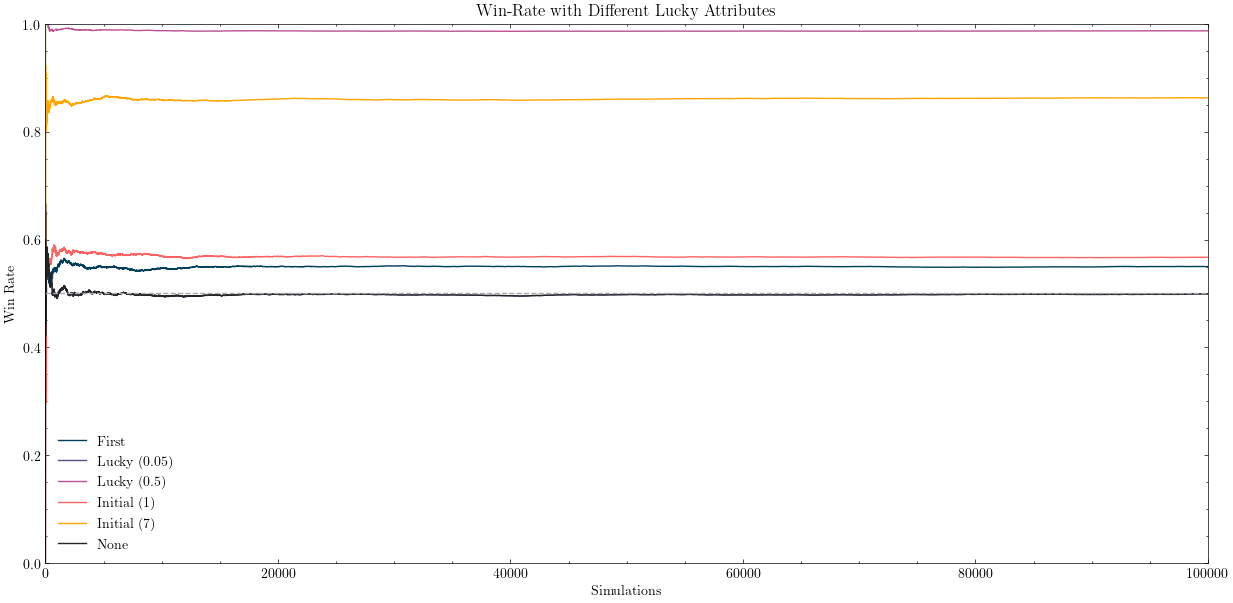

In [41]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_first.index, 1-df_first["win_rate"], color = palette[0], label = "First")
plt.plot(df_lucky[0].index, lucky_winrates[0], color = palette[1], label = "Lucky (0.05)")
plt.plot(df_lucky[-2].index, lucky_winrates[-2], color = palette[2], label = "Lucky (0.5)")
plt.plot(df_initial[0].index, initial_winrates[0], color = palette[3], label = "Initial (1)")
plt.plot(df_initial[-1].index, initial_winrates[-1], color = palette[4], label = "Initial (7)")
plt.plot(df_none.index, df_none["win_rate"], color = "#242526", label = "None")
plt.legend()

plt.hlines(0.5, 0, len(df_color), color = "#a9a9a9", linestyles="dashed")

plt.title("Win-Rate with Different Lucky Attributes")
plt.ylim(0,1)
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.margins(x=0)
plt.show()

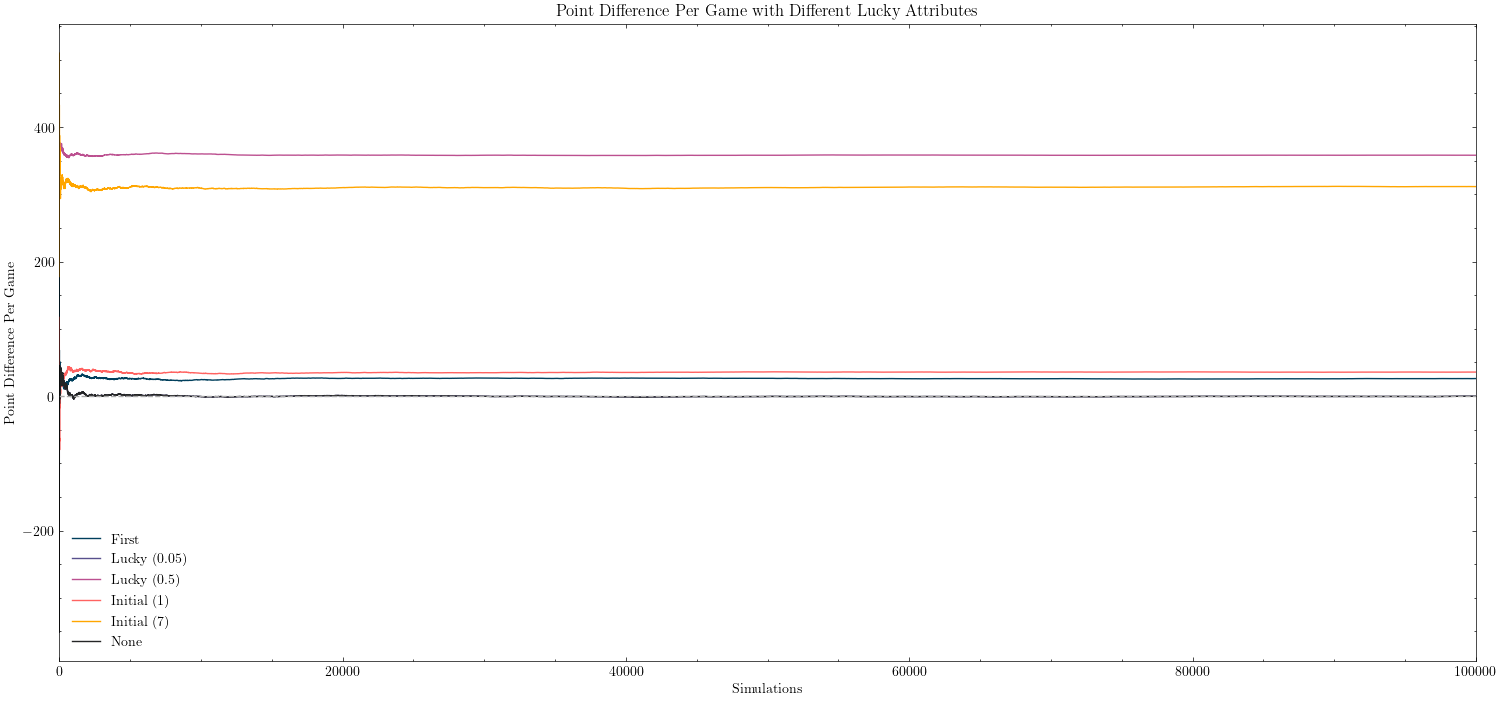

In [42]:
fig = plt.figure(1, figsize=(15,7), layout="constrained")

plt.plot(df_first.index, 1-df_first["points_difference_per_game"], color = palette[0], label = "First")
plt.plot(df_lucky[0].index, lucky_points[0], color = palette[1], label = "Lucky (0.05)")
plt.plot(df_lucky[-2].index, lucky_points[-2], color = palette[2], label = "Lucky (0.5)")
plt.plot(df_initial[0].index, initial_points[0], color = palette[3], label = "Initial (1)")
plt.plot(df_initial[-1].index, initial_points[-1], color = palette[4], label = "Initial (7)")
plt.plot(df_none.index, df_none["points_difference_per_game"], color = "#242526", label = "None")
plt.legend()

plt.hlines(0, 0, len(df_color), color = "#a9a9a9", linestyles="dashed")

plt.title("Point Difference Per Game with Different Lucky Attributes")
plt.xlabel("Simulations")
plt.ylabel("Point Difference Per Game")
plt.margins(x=0)
plt.show()

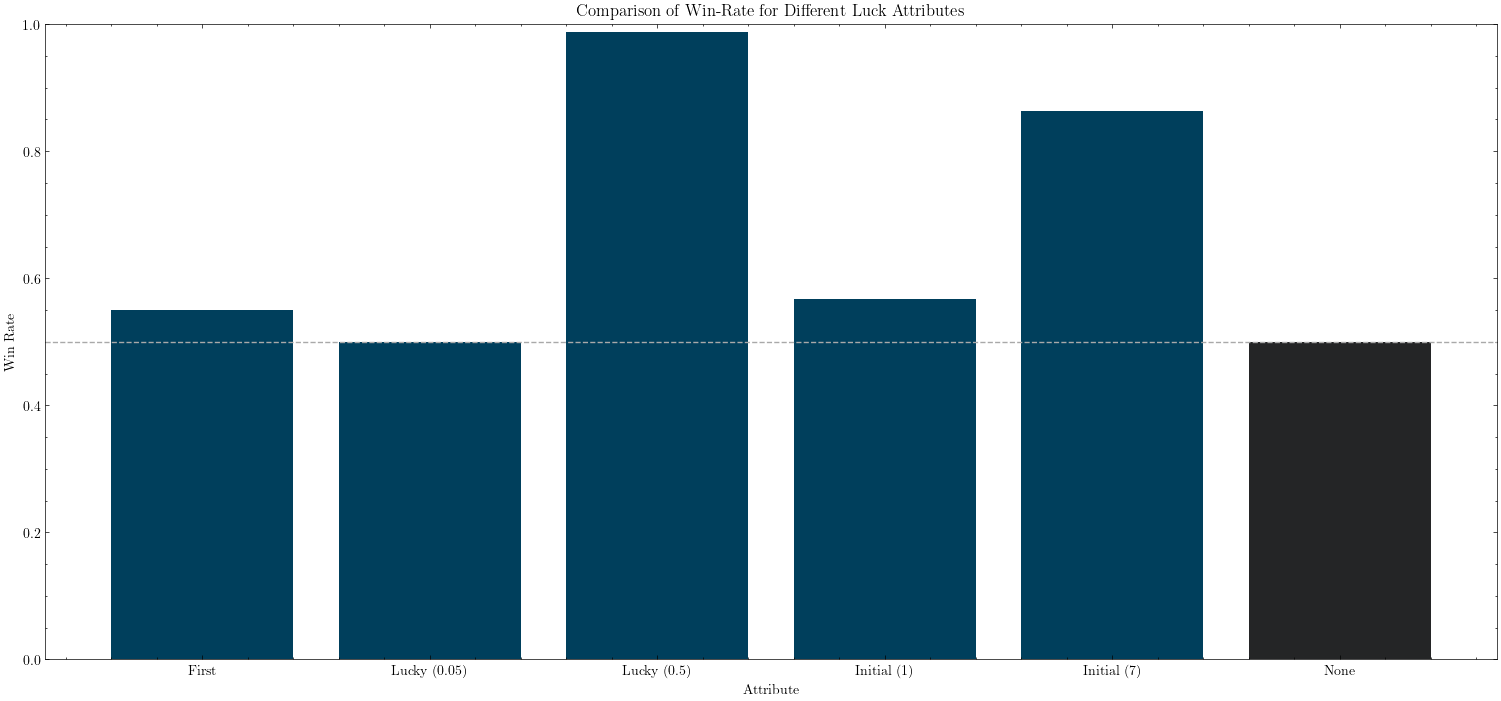

In [43]:
fig = plt.figure(1, figsize=(15,7), layout="constrained")

plt.bar("First", 1-df_first["win_rate"].iloc[-1], color = palette[0], label = "First")
plt.bar("Lucky (0.05)", lucky_winrates[0].iloc[-1], color = palette[0], label = "Lucky (0.05)")
plt.bar("Lucky (0.5)", lucky_winrates[-2].iloc[-1], color = palette[0], label = "Lucky (0.5)")
plt.bar("Initial (1)", initial_winrates[0].iloc[-1], color = palette[0], label = "Initial (1)")
plt.bar("Initial (7)", initial_winrates[-1].iloc[-1], color = palette[0], label = "Initial (7)")
plt.bar("None", df_none["win_rate"].iloc[-1], color = "#242526", label = "None")
plt.title("Comparison of Win-Rate for Different Luck Attributes")
plt.xlabel("Attribute")
plt.ylabel("Win Rate")
plt.ylim(0,1)


plt.axhline(y=0.5, color="#a9a9a9", linestyle="dashed")

plt.show()

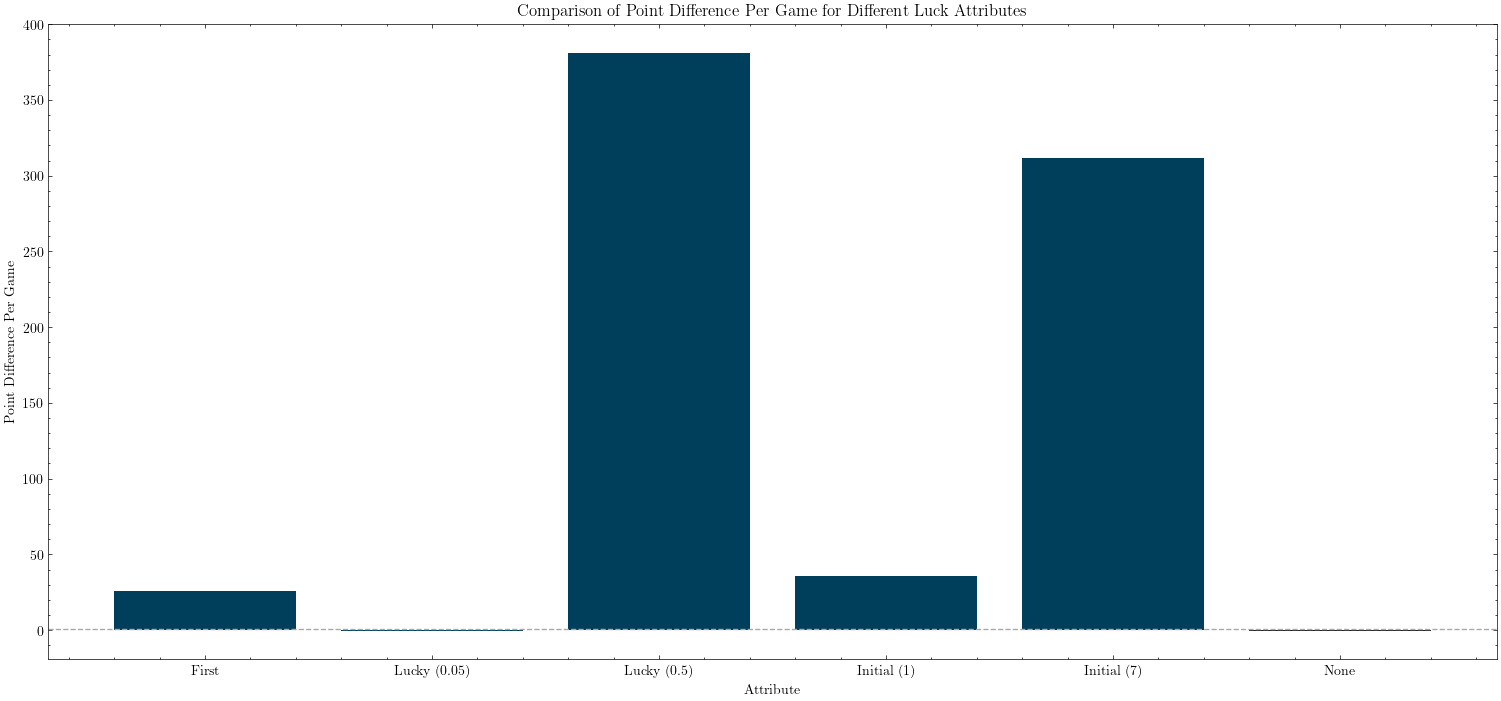

In [44]:
fig = plt.figure(1, figsize=(15,7), layout="constrained")

plt.bar("First", 1-df_first["points_difference_per_game"].iloc[-1], color = palette[0], label = "First")
plt.bar("Lucky (0.05)", lucky_points[0].iloc[-1], color = palette[0], label = "Lucky (0.05)")
plt.bar("Lucky (0.5)", lucky_points[-1].iloc[-1], color = palette[0], label = "Lucky (0.5)")
plt.bar("Initial (1)", initial_points[0].iloc[-1], color = palette[0], label = "Initial (1)")
plt.bar("Initial (7)", initial_points[-1].iloc[-1], color = palette[0], label = "Initial (7)")
plt.bar("None", df_none["points_difference_per_game"].iloc[-1], color = "#242526", label = "None")
plt.title("Comparison of Point Difference Per Game for Different Luck Attributes")
plt.xlabel("Attribute")
plt.ylabel("Point Difference Per Game")


plt.axhline(y=0.5, color="#a9a9a9", linestyle="dashed")

plt.show()

#### Comparison of Lucky Draw Values
***

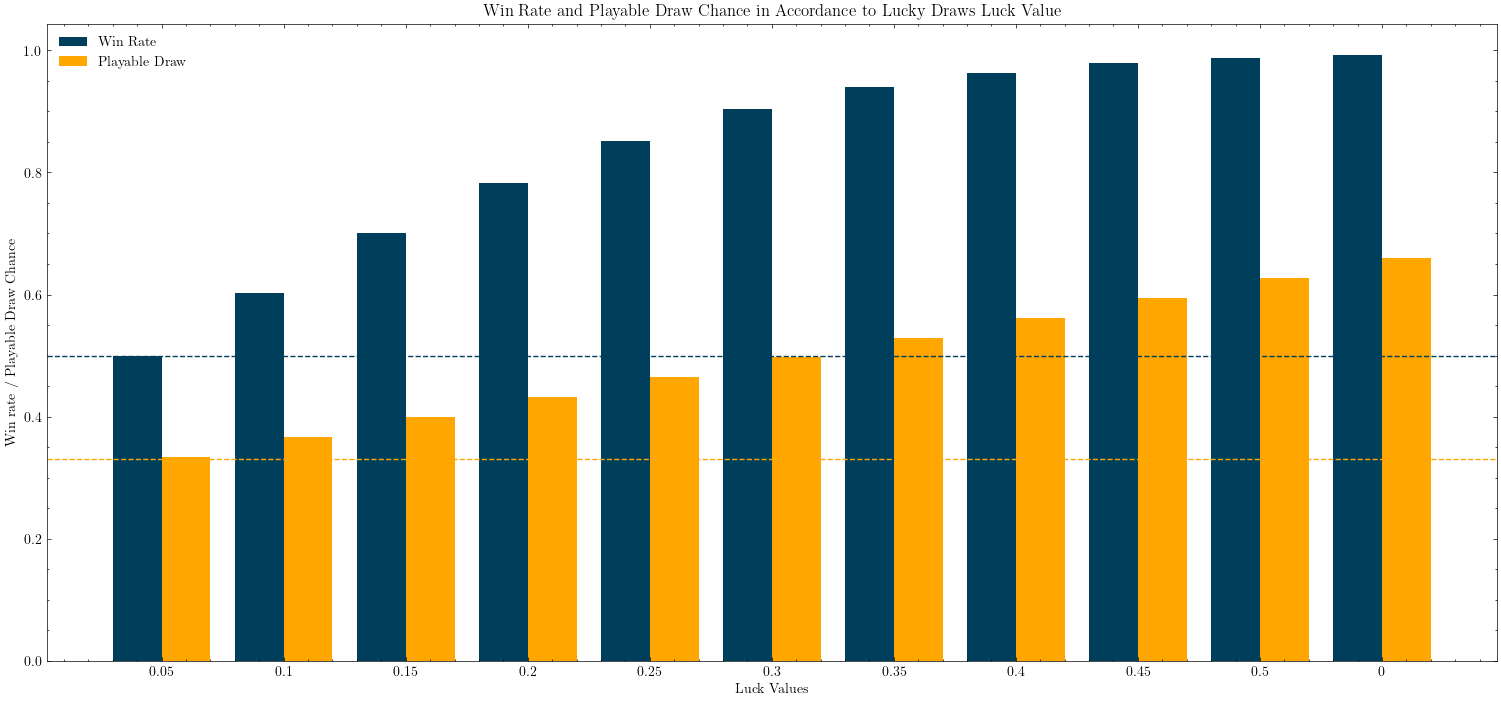

In [45]:
bar_width = 0.4
ind = np.arange(11)

fig, ax = plt.subplots(1, figsize = (15,7), layout="constrained")
bar1 = ax.bar(ind - bar_width/2, [series.iloc[-1] for series in lucky_winrates], bar_width, label='Win Rate', color = palette[0])
bar2 = ax.bar(ind + bar_width/2, playable_draw, bar_width, label='Playable Draw', color = palette[-1])

ax.set_title('Win Rate and Playable Draw Chance in Accordance to Lucky Draws Luck Value')
ax.set_xlabel('Luck Values')
ax.set_ylabel('Win rate / Playable Draw Chance')
ax.set_xticks(ind)
ax.set_xticklabels([str(round(i*0.05,2)) for i in range(1,11)] + [0])
ax.legend()

plt.axhline(y=0.5, color=palette[0], linestyle="dashed")
plt.axhline(y=0.33, color=palette[-1], linestyle="dashed")

plt.show()

#### Comparison of Initial Card Values
***

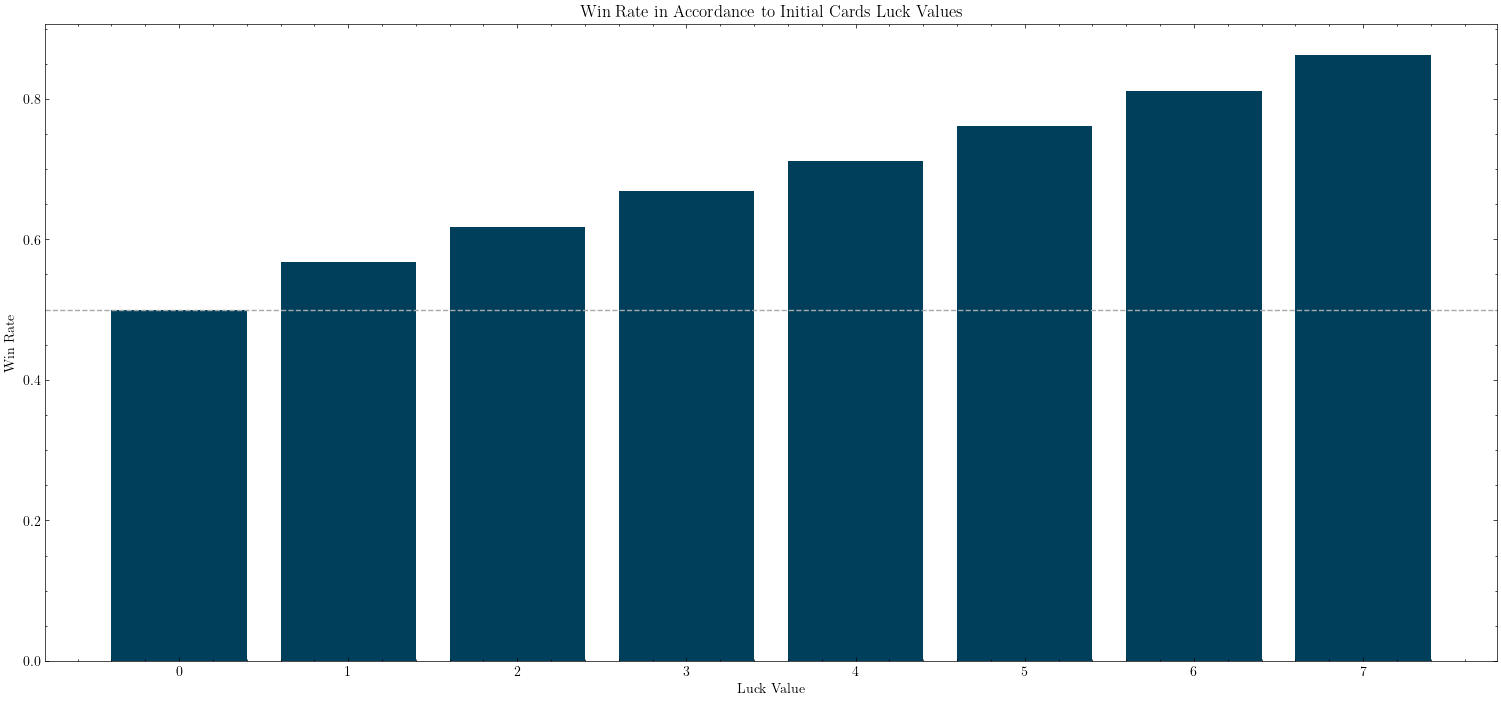

In [46]:
fig = plt.figure(1, figsize=(15,7), layout="constrained")

plt.bar(0, df_none["win_rate"].iloc[-1], color = palette[0])
plt.bar(range(1,8),[series.iloc[-1] for series in initial_winrates], color = palette[0])

plt.title("Win Rate in Accordance to Initial Cards Luck Values")
plt.xlabel("Luck Value")
plt.ylabel("Win Rate")


plt.axhline(y=0.5, color="#a9a9a9", linestyle="dashed")

plt.show()